# Importing Required Libraries


In [ ]:
import os
from os.path import exists, join, basename, splitext

# Cloning the Facebook Detectron Model using the following link

In [ ]:
# clone
git_repo_url = 'https://github.com/facebookresearch/Detectron.git'
!git clone -q --depth 1 $git_repo_url

In [ ]:
# install dependencies
!cd Detectron && pip install -q -r requirements.txt

# build 
!cd Detectron && make

# test
!python Detectron/detectron/tests/test_spatial_narrow_as_op.py 

     |████████████████████████████████| 375 kB 4.1 MB/s 
python setup.py develop --user
Compiling detectron/utils/cython_bbox.pyx because it changed.
Compiling detectron/utils/cython_nms.pyx because it changed.
[1/2] Cythonizing detectron/utils/cython_bbox.pyx
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Detectron/detectron/utils/cython_bbox.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/2] Cythonizing detectron/utils/cython_nms.pyx
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Detectron/detectron/utils/cython_nms.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running develop
running egg_info
creating Detectron.egg-info
writing Detectron.egg-info/PKG-INFO
writ

In [ ]:
import sys
import time
from matplotlib.image import imread
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = True

from IPython.display import clear_output

# Moving Test Images from Google Drive 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir '/content/Image_Dir'
!mkdir '/content/Output_Dir'

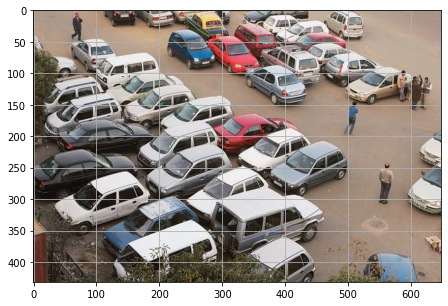

In [ ]:
import shutil, os, glob

filePath = '/content/drive/MyDrive/Colab Notebooks/DLAssignments/Cars/Cars1.jpg'
images_dir = '/content/Image_Dir'
shutil.move(filePath, images_dir)
image_file_ext = '.jpg'
image_file = 'Cars1.jpg'
plt.figure(figsize=(10, 5))
img = imread(join(images_dir, image_file))
plt.imshow(img)

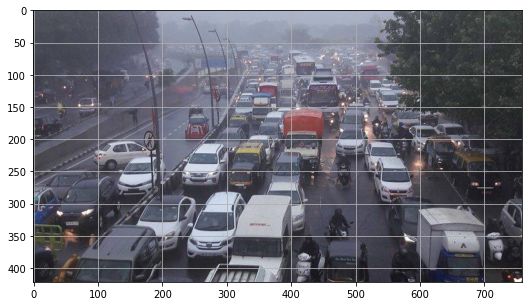

In [ ]:
filePath = '/content/drive/MyDrive/Colab Notebooks/DLAssignments/Cars/Cars4.jpg'
images_dir = '/content/Image_Dir'
shutil.move(filePath, images_dir)
image_file_ext = '.jpg'
image_file = 'Cars4.jpg'
plt.figure(figsize=(10, 5))
img = imread(join(images_dir, image_file))
plt.imshow(img)

# Downloading a test image from the internet:

In [ ]:
IMAGE_URL = 'https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/traffic_camera.jpg'

image_file = basename(IMAGE_URL)
image_file_ext = splitext(image_file)[1][1:]
images_dir = 'Image_Dir'
# !mkdir -p $images_dir && rm -rf $images_dir/*
!wget -q -O $images_dir/$image_file $IMAGE_URL

# Using the Mask RCNN Architecture and the pre-trained weights to generate predictions

In [ ]:
images_dir = 'Image_Dir'
!cd Detectron && python tools/infer_simple.py  \
            --cfg configs/12_2017_baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml   \
            --output-dir /content/Output_Dir   \
            --wts https://dl.fbaipublicfiles.com/detectron/36494496/12_2017_baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml.07_50_11.fkwVtEvg/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl   \
            --thresh 0.6 \
            --output-ext png --always-out --image-ext jpg  \
            ../$images_dir


 # Visualizing the Results

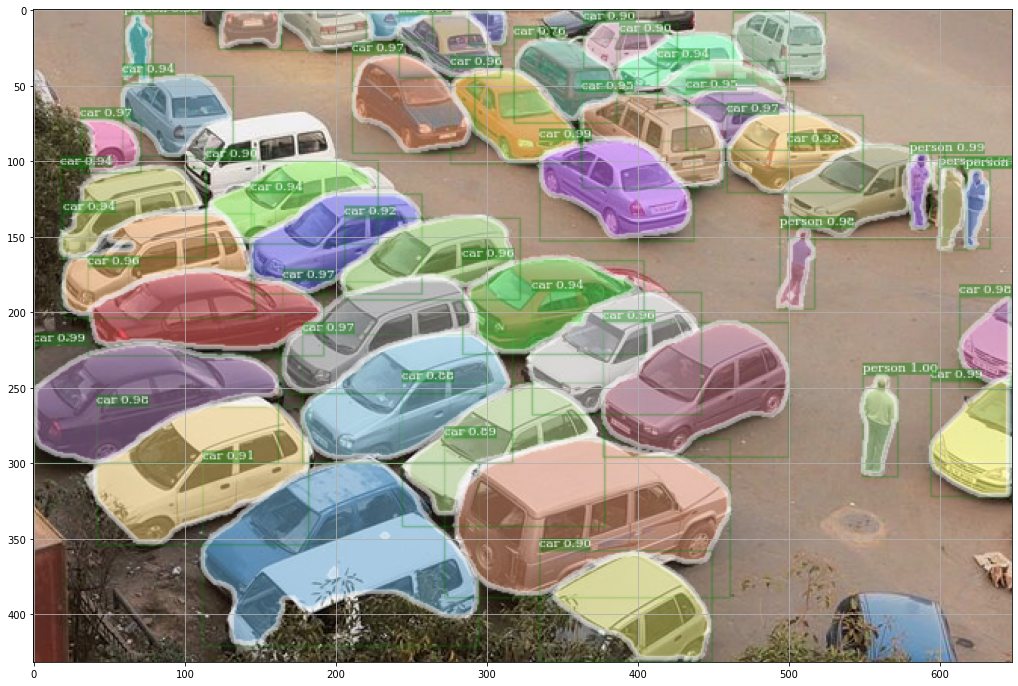

In [ ]:
plt.figure(figsize=(24, 12))
file = '/content/Output_Dir/Cars1.jpg.png'
img = imread(file)
plt.imshow(img)

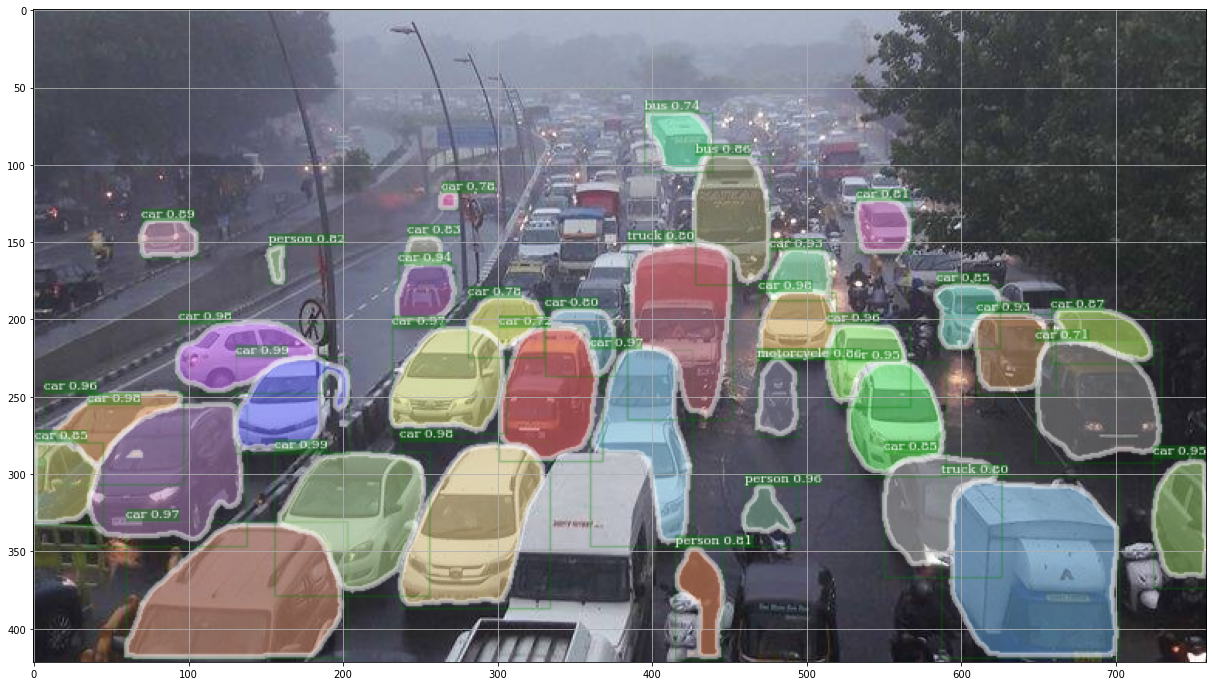

In [ ]:
plt.figure(figsize=(24, 12))
file = '/content/Output_Dir/Cars4.jpg.png'
img = imread(file)
plt.imshow(img)

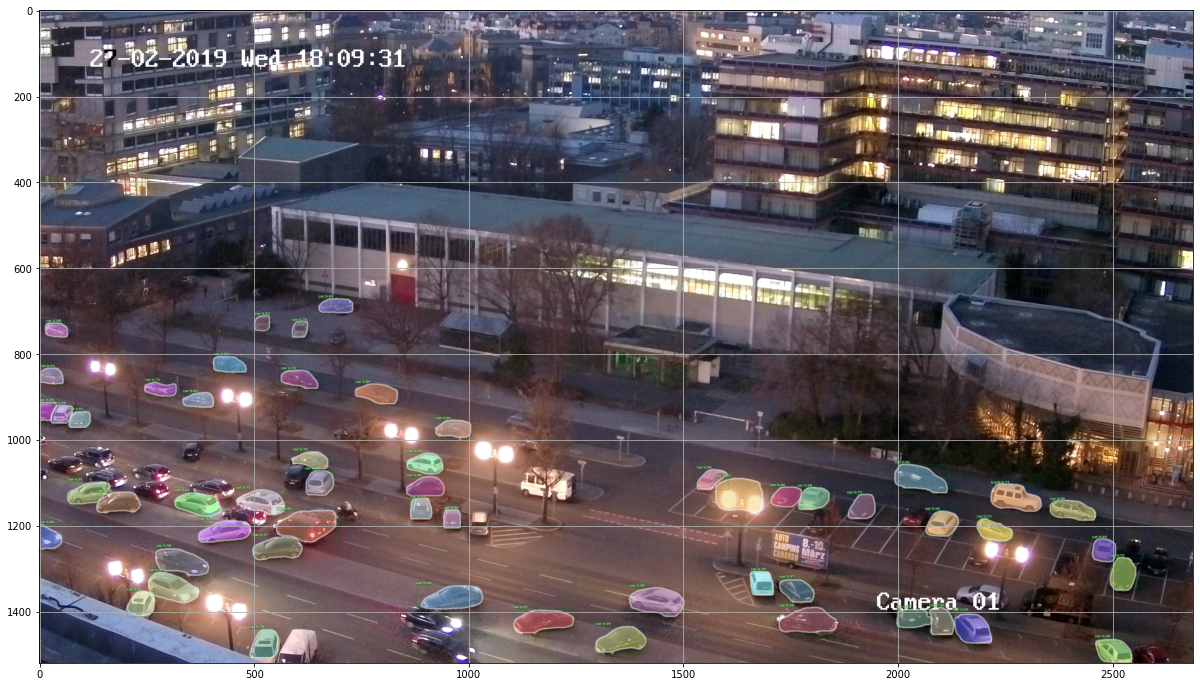

In [ ]:
plt.figure(figsize=(24, 12))
file = '/content/Output_Dir/traffic_camera.jpg.png'
img = imread(file)
plt.imshow(img)